In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro, mannwhitneyu, ttest_ind
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler,LabelBinarizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn import svm

In [2]:
# reading in data
data = pd.read_csv('dataset.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,10,416.583333,0.0,0.036667,0.000000,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
1,0,0.000000,0,0.0,3,133.500000,0.0,0.088889,0.000000,0.0,Mar,1,2,1,8,Returning_Visitor,False,False
2,5,408.408333,2,47.5,54,1547.477273,0.0,0.017333,0.000000,0.0,Nov,2,2,3,2,Returning_Visitor,True,True
3,0,0.000000,0,0.0,19,686.583333,0.0,0.010526,0.000000,0.0,Dec,1,1,5,2,Returning_Visitor,True,False
4,0,0.000000,0,0.0,69,2734.818254,0.0,0.004353,49.392716,0.0,May,4,5,3,2,Returning_Visitor,False,True


In [3]:
# checking shape
data.shape

(12330, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


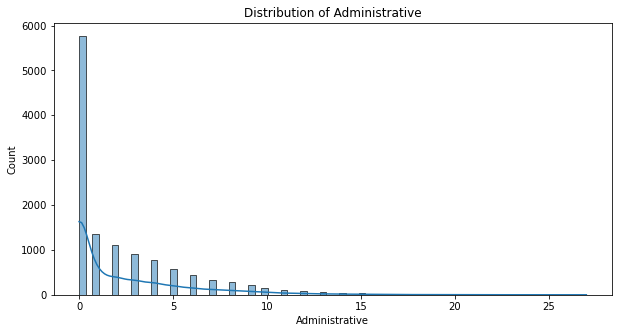

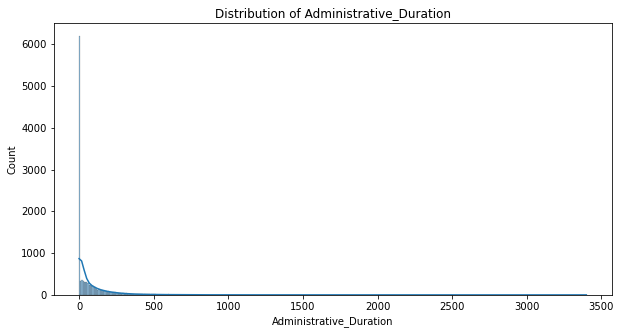

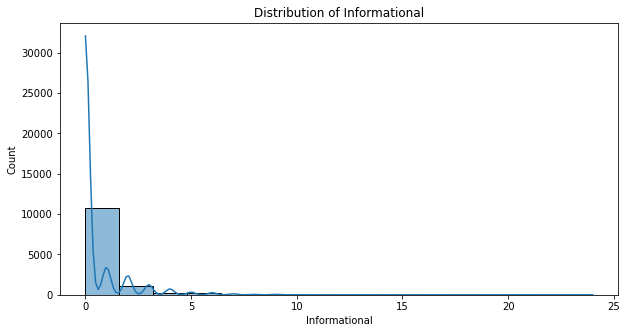

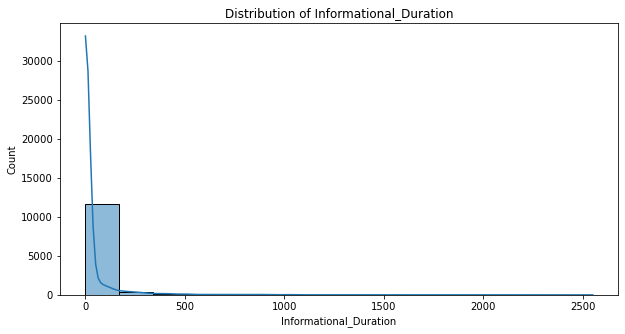

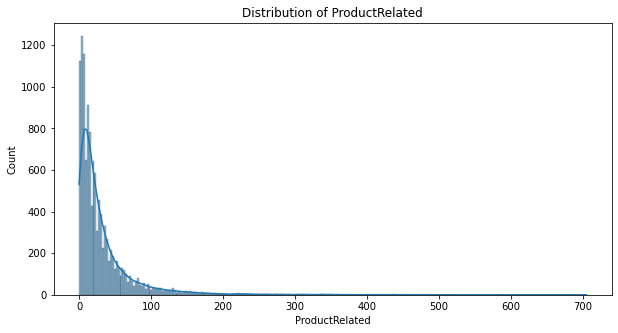

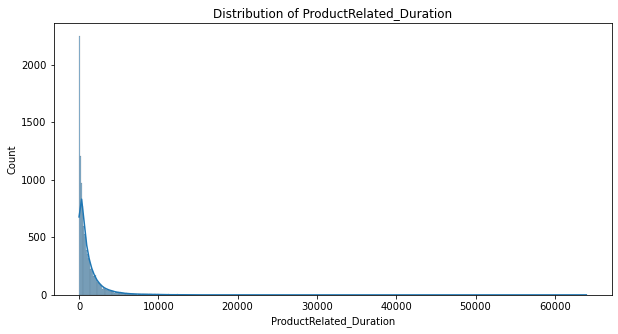

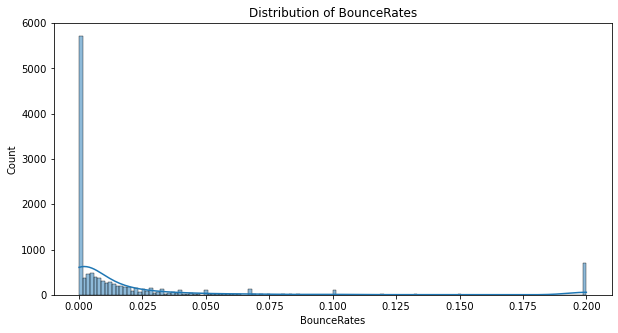

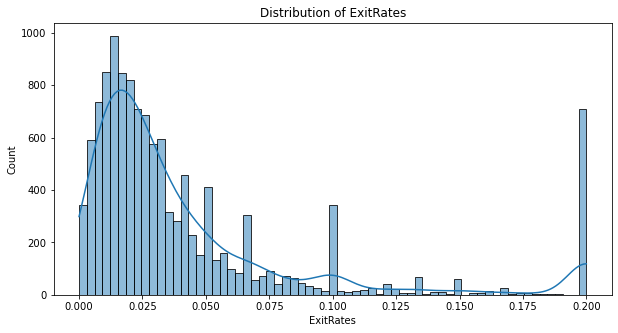

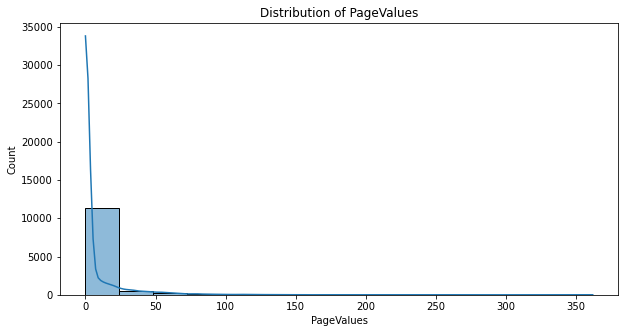

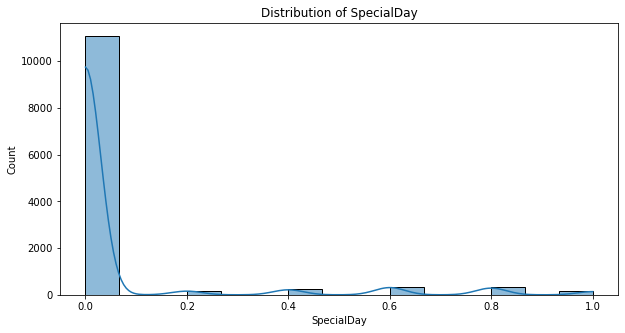

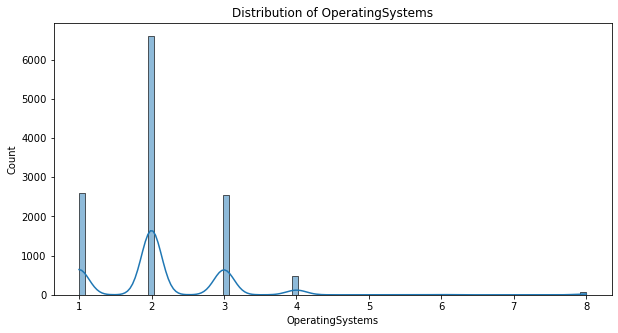

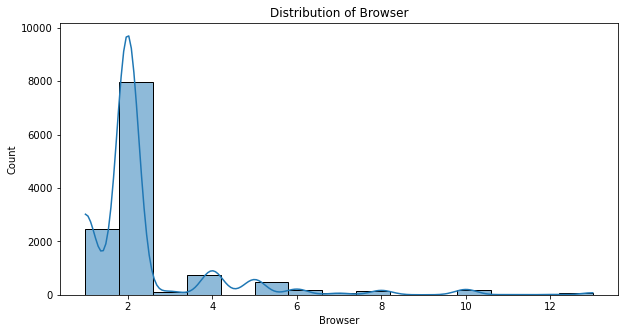

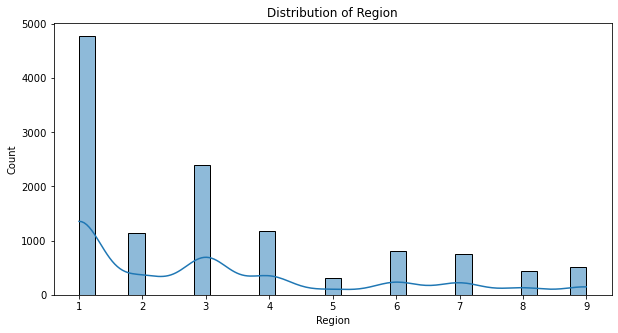

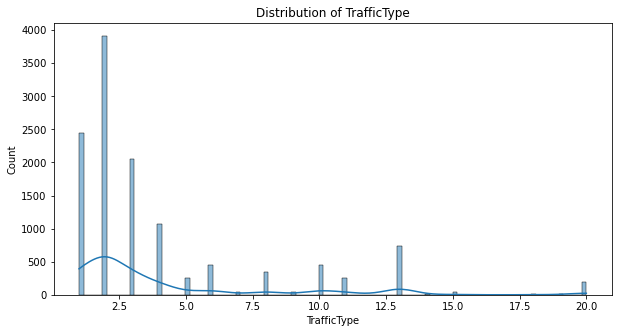

In [7]:
# Distribution plots for numerical features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


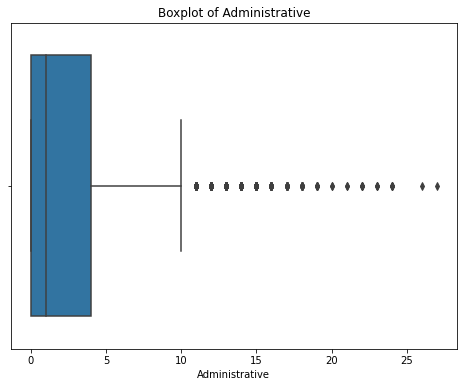

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


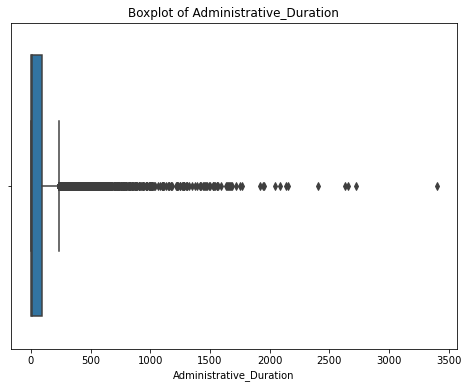

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


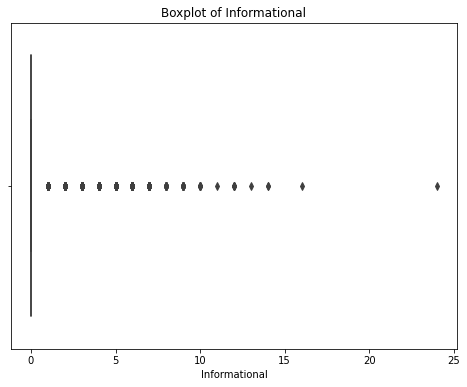

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


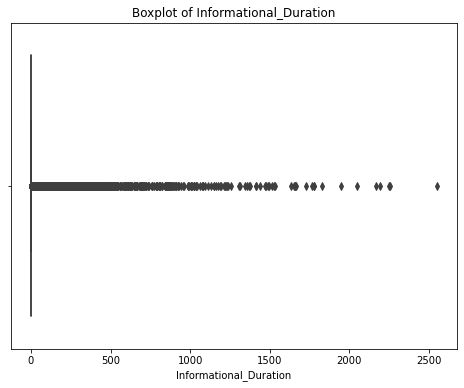

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


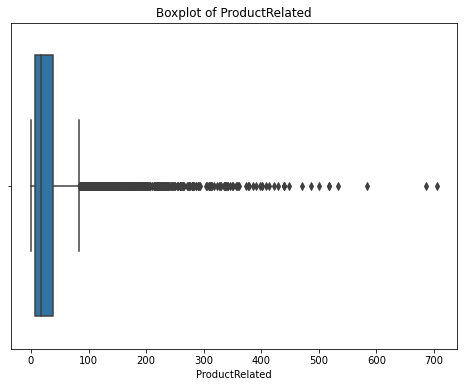

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


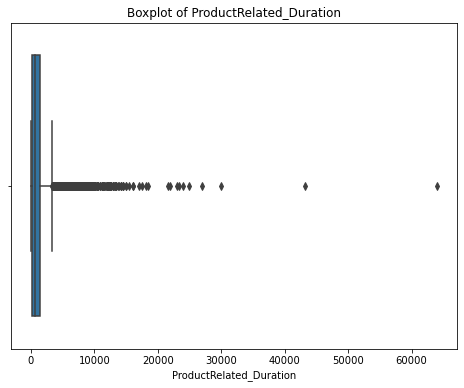

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


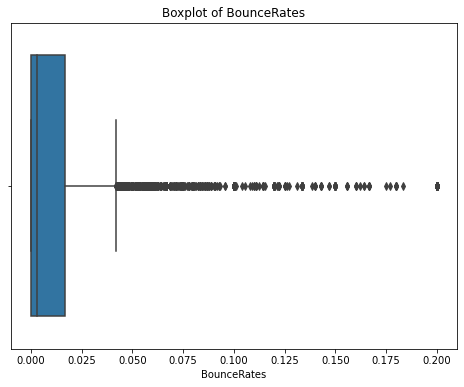

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


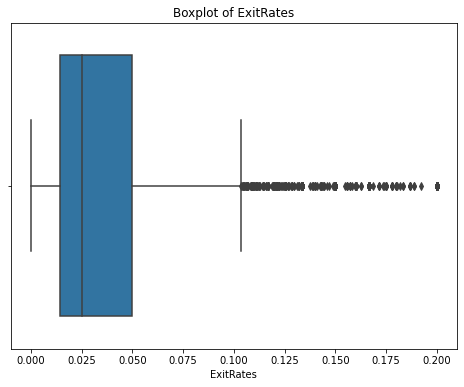

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


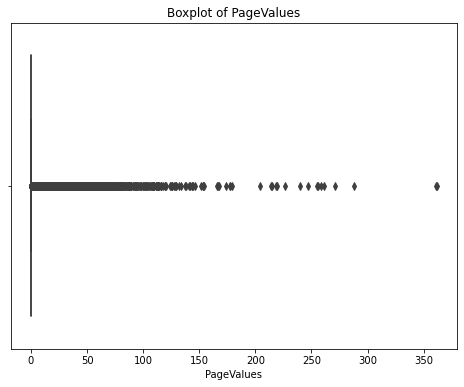

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


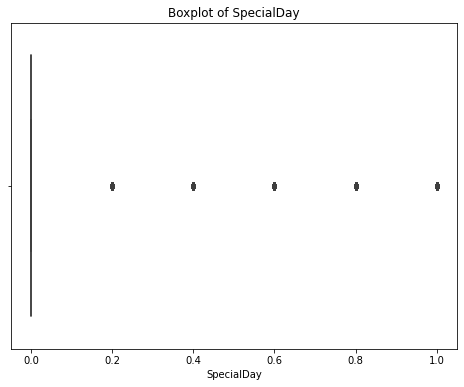

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


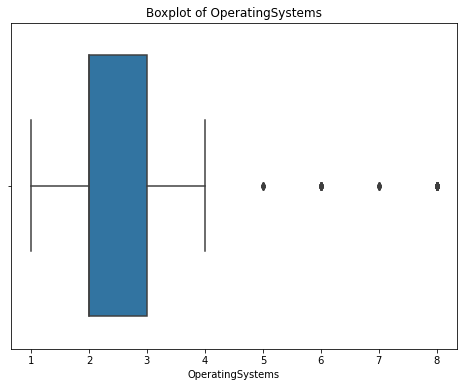

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


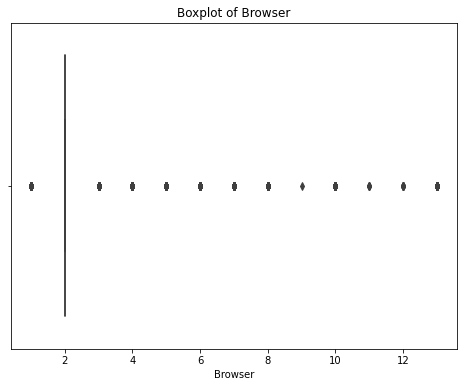

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


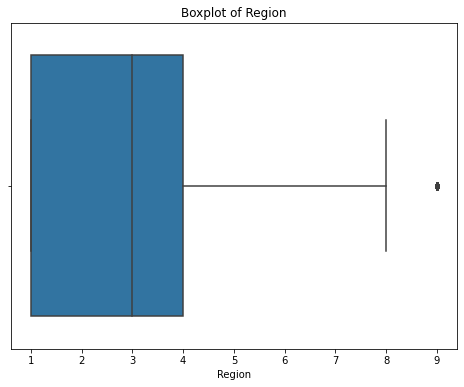

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


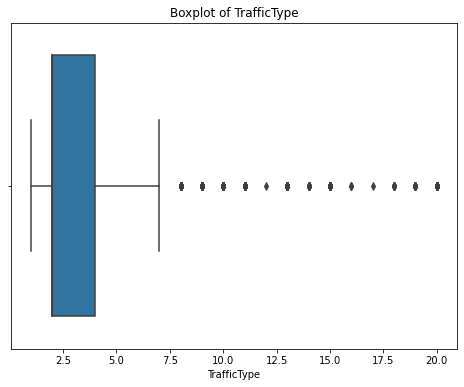

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

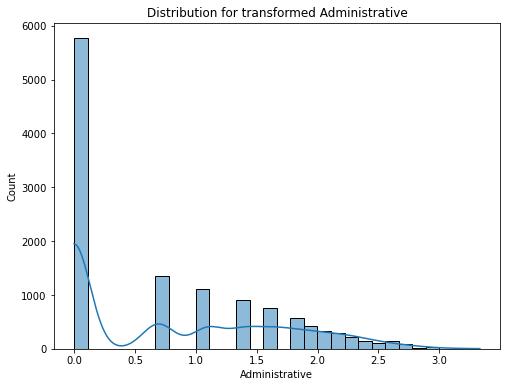

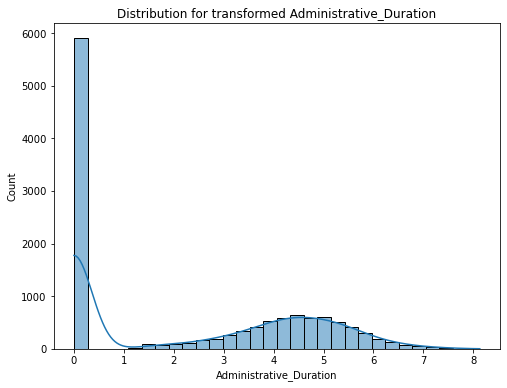

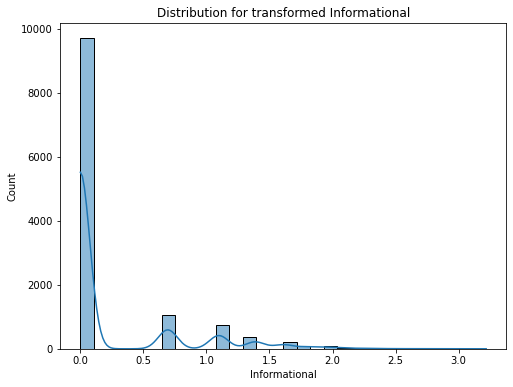

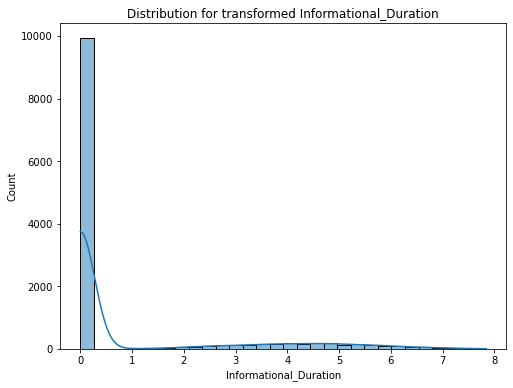

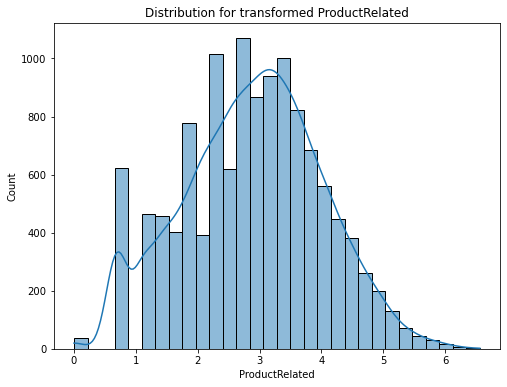

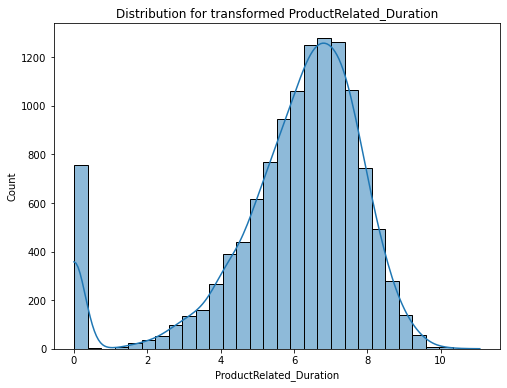

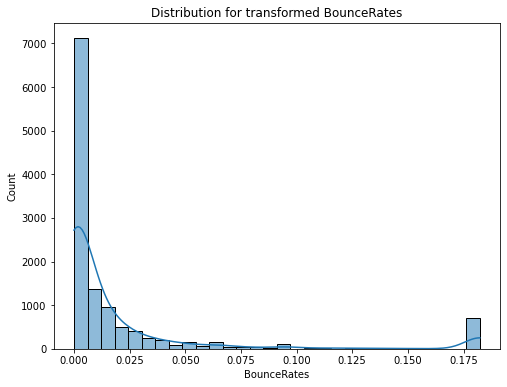

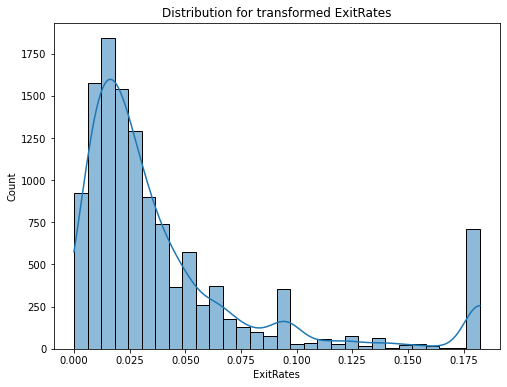

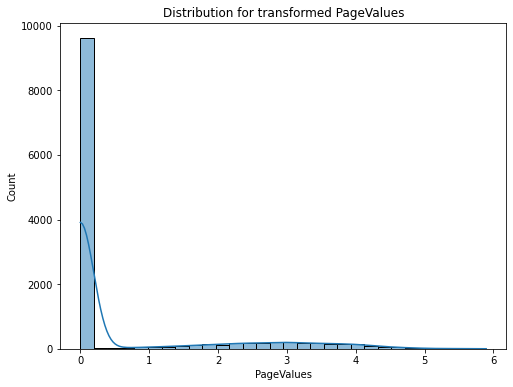

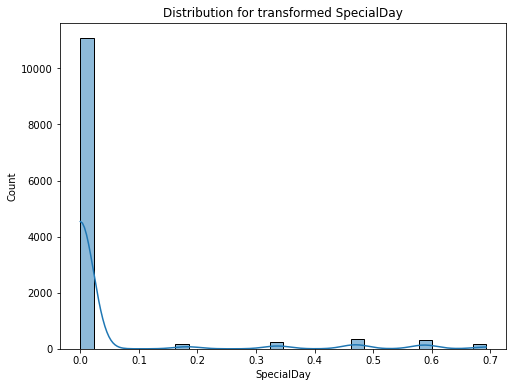

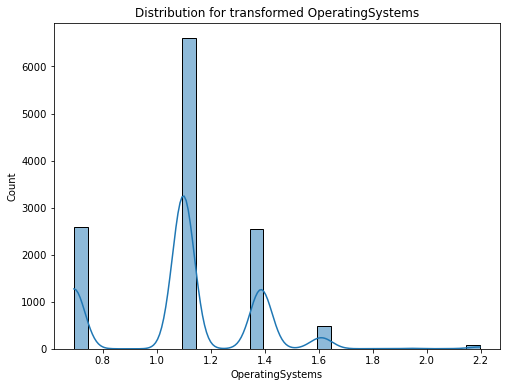

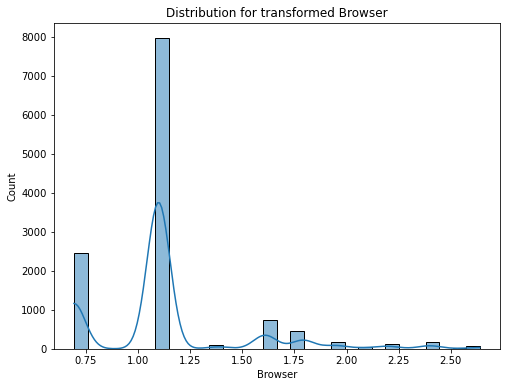

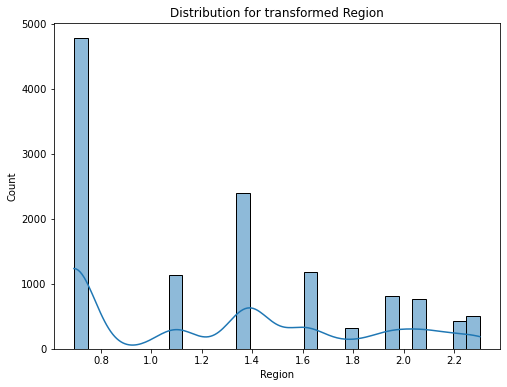

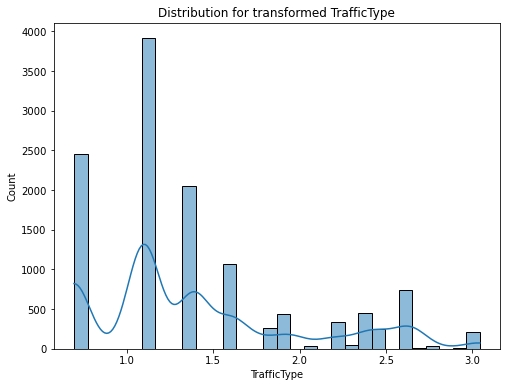

In [9]:
def transform(data, numerical_features):
    for feature in numerical_features:
        data[feature] = np.log(data[feature] + 1)
        plt.figure(figsize=(8, 6))
        sns.histplot(data[feature], bins=30, kde=True)
        plt.title(f'Distribution for transformed {feature}')
        
        plt.show()

transform(data, numerical_features)

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


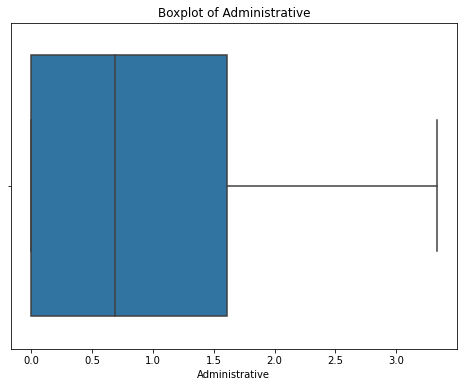

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


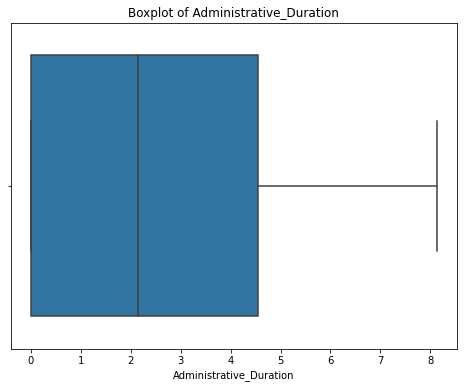

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


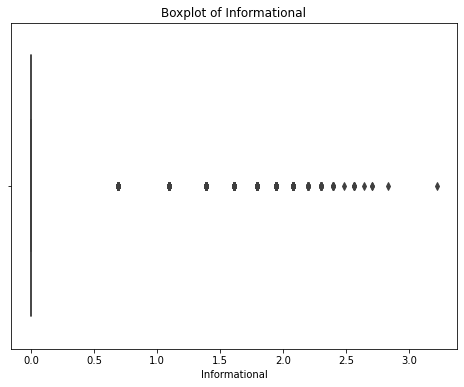

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


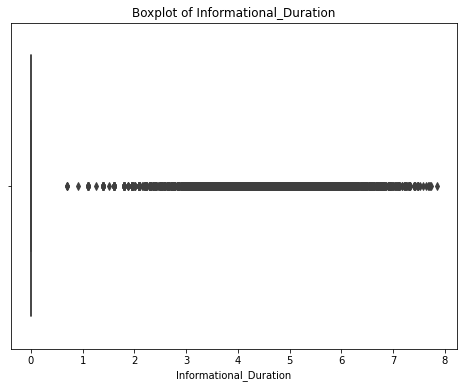

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


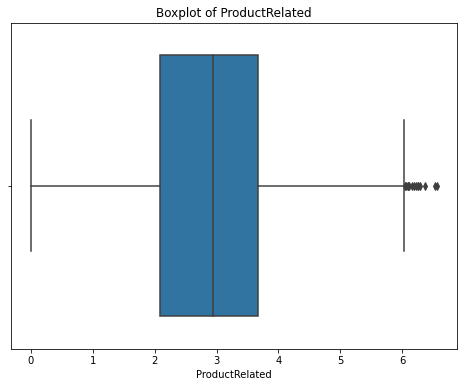

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


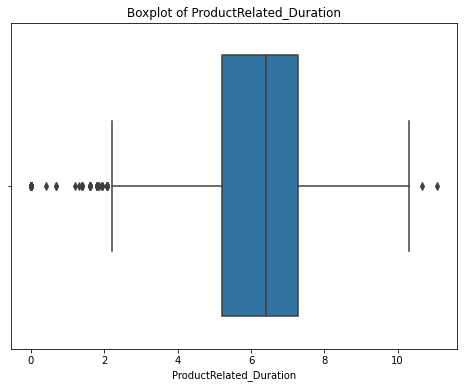

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


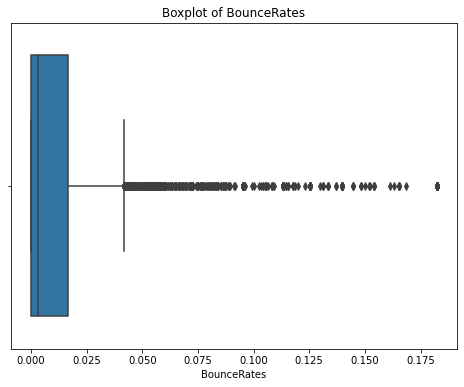

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


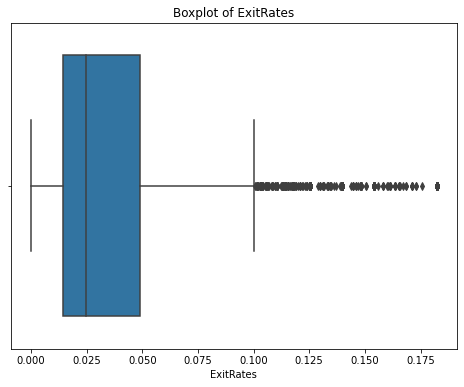

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


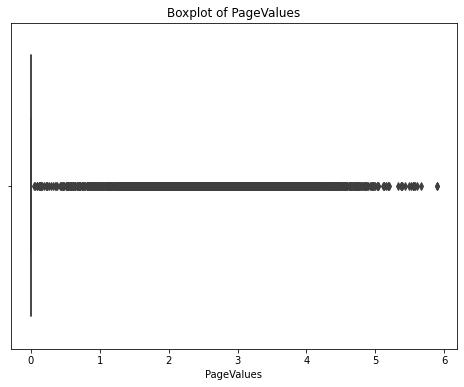

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


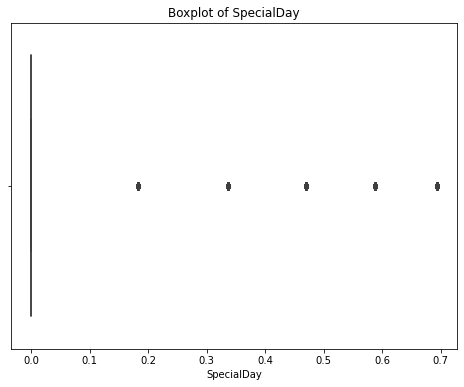

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


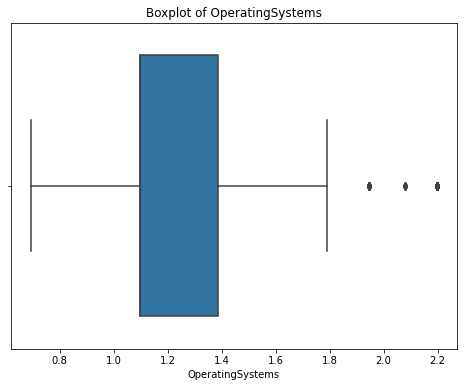

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


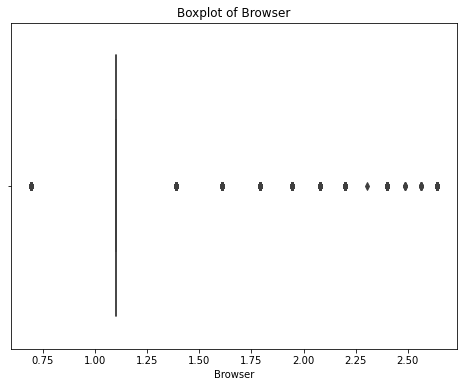

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


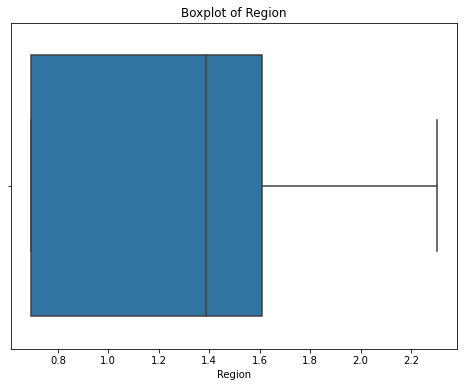

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


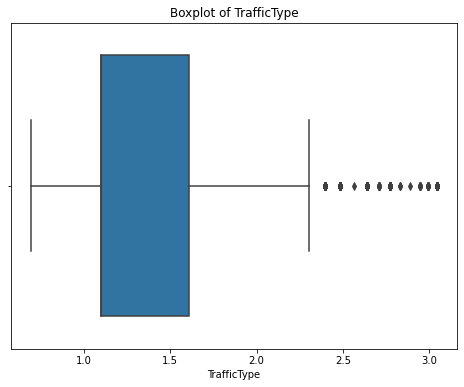

In [10]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
  
    plt.show()

In [11]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.796964,2.306655,0.236899,0.844331,2.885527,5.962529,0.020917,0.041151,0.624125,0.046793,1.102261,1.131488,1.268759,1.403444
std,0.862851,2.364922,0.495537,1.816394,1.123923,2.043091,0.044470,0.044487,1.267818,0.148051,0.267104,0.360912,0.545113,0.614011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147
25%,0.000000,0.000000,0.000000,0.000000,2.079442,5.221099,0.000000,0.014185,0.000000,0.000000,1.098612,1.098612,0.693147,1.098612
50%,0.693147,2.140066,0.000000,0.000000,2.944439,6.396824,0.003108,0.024845,0.000000,0.000000,1.098612,1.098612,1.386294,1.098612
75%,1.609438,4.546017,0.000000,0.000000,3.663562,7.289718,0.016673,0.048790,0.000000,0.000000,1.386294,1.098612,1.609438,1.609438
max,3.332205,8.131457,3.218876,7.843996,6.559615,11.066240,0.182322,0.182322,5.893752,0.693147,2.197225,2.639057,2.302585,3.044522


In [12]:
data.describe(include=['object', 'category'])


,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


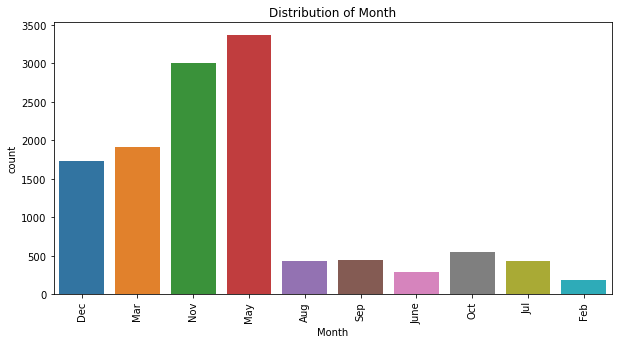

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


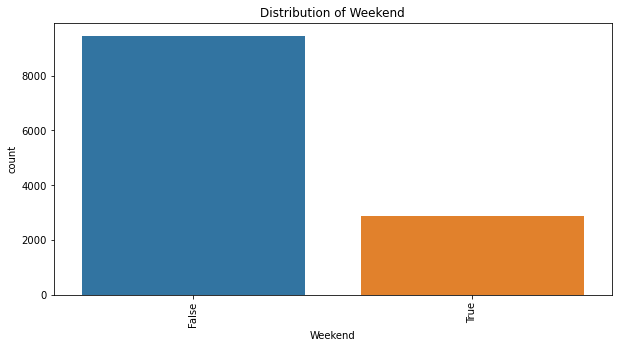

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


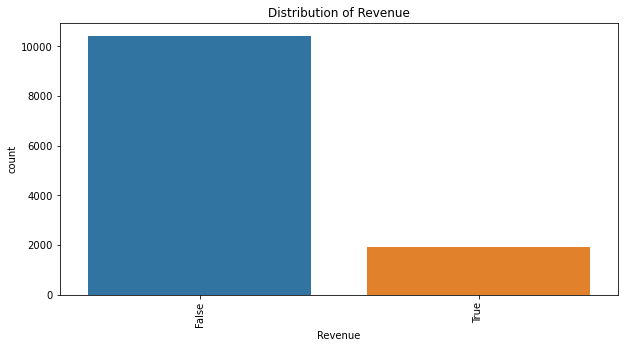

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


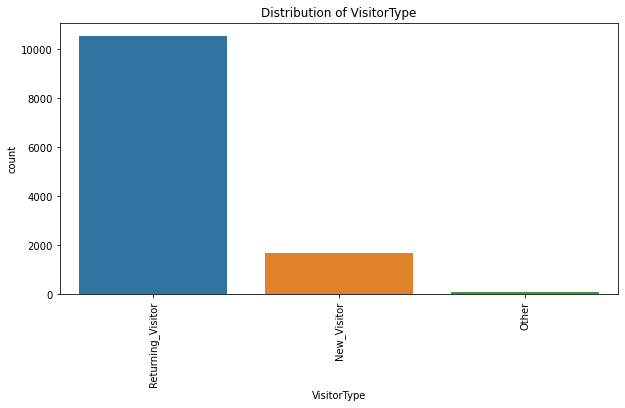

In [13]:
categorical_features = ['Month','Weekend', 'Revenue', 'VisitorType']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

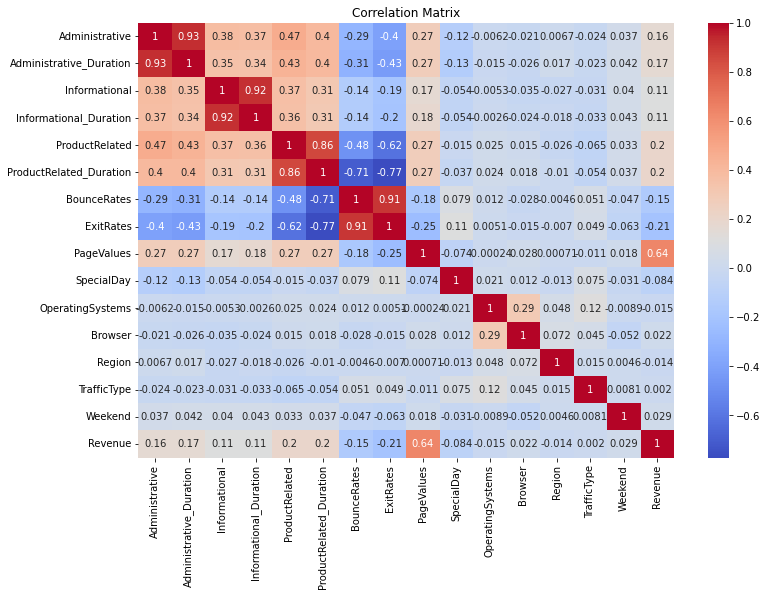

In [14]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:

# Function to identify outliers using IQR
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers



# Detect and print outliers for each feature
for feature in numerical_features:
    outliers = detect_outliers(data, feature)
    print(f'Feature: {feature}, Number of outliers: {len(outliers)}')


Feature: Administrative, Number of outliers: 0
Feature: Administrative_Duration, Number of outliers: 0
Feature: Informational, Number of outliers: 2631
Feature: Informational_Duration, Number of outliers: 2405
Feature: ProductRelated, Number of outliers: 15
Feature: ProductRelated_Duration, Number of outliers: 810
Feature: BounceRates, Number of outliers: 1542
Feature: ExitRates, Number of outliers: 1092
Feature: PageValues, Number of outliers: 2730
Feature: SpecialDay, Number of outliers: 1251
Feature: OperatingSystems, Number of outliers: 105
Feature: Browser, Number of outliers: 4369
Feature: Region, Number of outliers: 0
Feature: TrafficType, Number of outliers: 1716


In [16]:
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Apply capping to all numerical features
for feature in numerical_features:
    data = cap_outliers(data, feature)

# Verify if outliers are capped
for feature in numerical_features:
    outliers = detect_outliers(data, feature)
    print(f'Feature: {feature}, Number of outliers after capping: {len(outliers)}')

Feature: Administrative, Number of outliers after capping: 0
Feature: Administrative_Duration, Number of outliers after capping: 0
Feature: Informational, Number of outliers after capping: 0
Feature: Informational_Duration, Number of outliers after capping: 0
Feature: ProductRelated, Number of outliers after capping: 0
Feature: ProductRelated_Duration, Number of outliers after capping: 0
Feature: BounceRates, Number of outliers after capping: 0
Feature: ExitRates, Number of outliers after capping: 0
Feature: PageValues, Number of outliers after capping: 0
Feature: SpecialDay, Number of outliers after capping: 0
Feature: OperatingSystems, Number of outliers after capping: 0
Feature: Browser, Number of outliers after capping: 0
Feature: Region, Number of outliers after capping: 0
Feature: TrafficType, Number of outliers after capping: 0


In [17]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.0,12330.0,12330.000000,12330.000000,12330.000000,12330.000000,12330.0,12330.0,12330.000000,1.233000e+04,12330.000000,12330.000000
mean,0.796964,2.306655,0.0,0.0,2.885309,6.093853,0.010826,0.035569,0.0,0.0,1.099484,1.098612e+00,1.268759,1.370882
std,0.862851,2.364922,0.0,0.0,1.123278,1.694064,0.014722,0.029399,0.0,0.0,0.257635,1.405599e-13,0.545113,0.547324
min,0.000000,0.000000,0.0,0.0,0.000000,2.118170,0.000000,0.000000,0.0,0.0,0.693147,1.098612e+00,0.693147,0.693147
25%,0.000000,0.000000,0.0,0.0,2.079442,5.221099,0.000000,0.014185,0.0,0.0,1.098612,1.098612e+00,0.693147,1.098612
50%,0.693147,2.140066,0.0,0.0,2.944439,6.396824,0.003108,0.024845,0.0,0.0,1.098612,1.098612e+00,1.386294,1.098612
75%,1.609438,4.546017,0.0,0.0,3.663562,7.289718,0.016673,0.048790,0.0,0.0,1.386294,1.098612e+00,1.609438,1.609438
max,3.332205,8.131457,0.0,0.0,6.039742,10.392646,0.041682,0.100698,0.0,0.0,1.817817,1.098612e+00,2.302585,2.375676


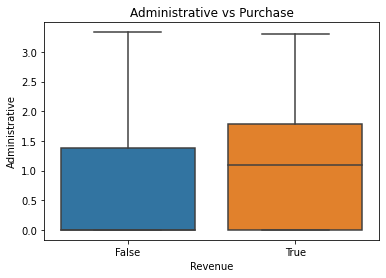

T-test results for Administrative: t_stat = 18.35301941678705, p_value = 3.032191473088064e-74


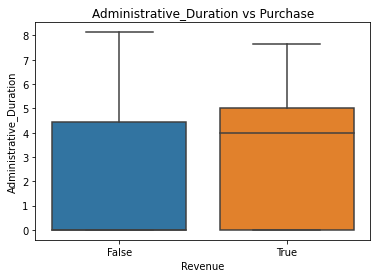

T-test results for Administrative_Duration: t_stat = 18.753503374008258, p_value = 2.1548827847769884e-77


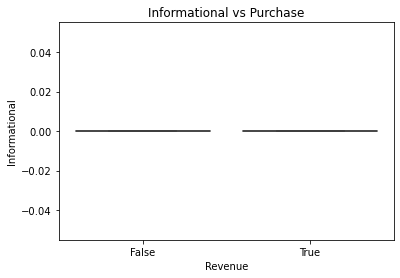

T-test results for Informational: t_stat = nan, p_value = nan


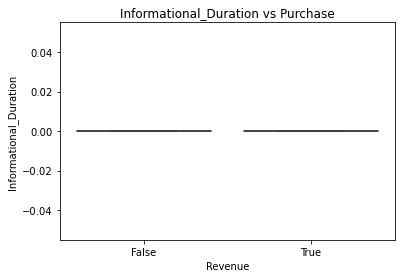

T-test results for Informational_Duration: t_stat = nan, p_value = nan


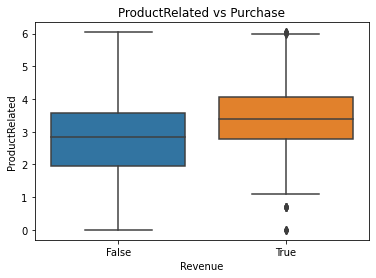

T-test results for ProductRelated: t_stat = 22.8318677597466, p_value = 4.806885123457879e-113


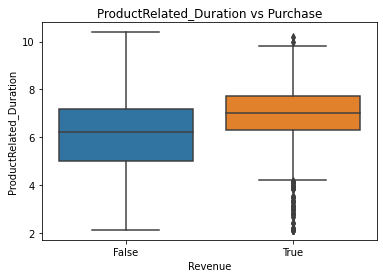

T-test results for ProductRelated_Duration: t_stat = 24.06286472298262, p_value = 4.573903022354002e-125


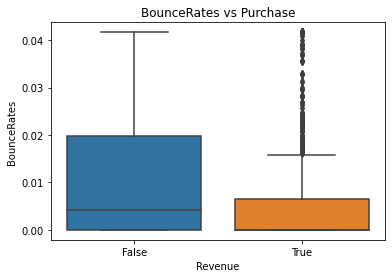

T-test results for BounceRates: t_stat = -20.37983183203902, p_value = 7.860819335993958e-91


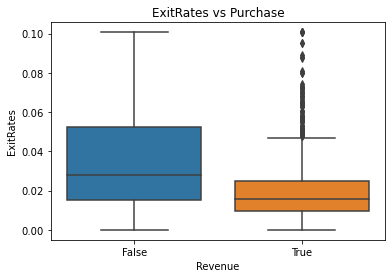

T-test results for ExitRates: t_stat = -27.42337178368529, p_value = 9.11270768374153e-161


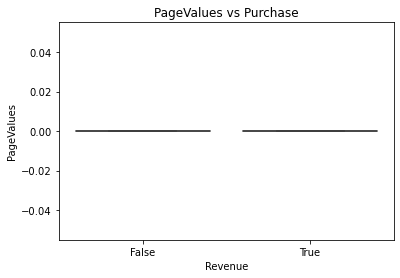

T-test results for PageValues: t_stat = nan, p_value = nan


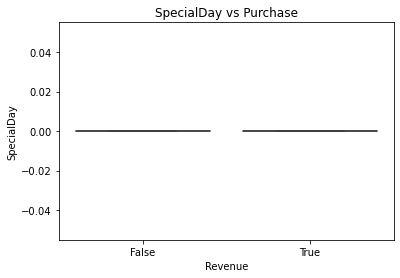

T-test results for SpecialDay: t_stat = nan, p_value = nan


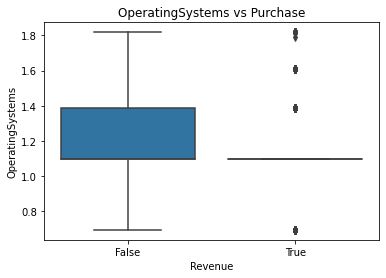

T-test results for OperatingSystems: t_stat = -1.907984547464059, p_value = 0.05641642078086543


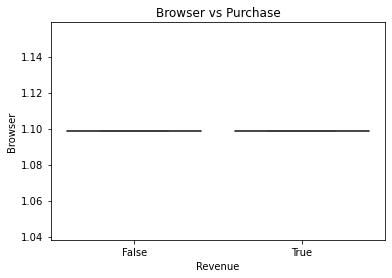

T-test results for Browser: t_stat = -33.1850728289607, p_value = 2.2411252636187207e-231


c:\Users\user\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


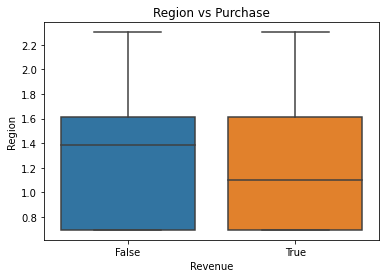

T-test results for Region: t_stat = -1.5867652856128187, p_value = 0.11259146050298714


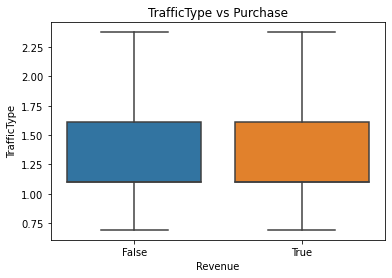

T-test results for TrafficType: t_stat = 0.6304002866720619, p_value = 0.5284444082028312


In [18]:
# Define a function to perform t-test and visualize box plot
def feature_analysis(feature):
    sns.boxplot(x='Revenue', y=feature, data=data)
    plt.title(f'{feature} vs Purchase')
    plt.show()

    purchase = data[data['Revenue'] == True][feature]
    non_purchase = data[data['Revenue'] == False][feature]

    t_stat, p_value = ttest_ind(purchase, non_purchase)
    print(f'T-test results for {feature}: t_stat = {t_stat}, p_value = {p_value}')



# Perform analysis for each feature
for feature in numerical_features:
    feature_analysis(feature)

In [19]:
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

# One-Hot Encoding for categorical columns
data = pd.get_dummies(data, columns=['Month', 'VisitorType'], drop_first=True)

In [20]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [21]:
X = data.drop(columns='Revenue')
y = data['Revenue']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [23]:
#from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_res = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
svm_model = SVC(C=0.1, gamma=0.01, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.01)

In [26]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
f1_train = f1_score(y_train, y_train_pred)
print(f'F1 Score on Training Set: {f1_train}')

# F1 score on test set
f1_test = f1_score(y_test, y_test_pred)
print(f'F1 Score on Test Set: {f1_test}')

F1 Score on Training Set: 0.0
F1 Score on Test Set: 0.0


In [27]:
X_train.shape

(9864, 26)

In [29]:
X_train_try = X_train[:4932]
y_train_try = y_train[:4932]

In [30]:
X_train_try.shape

(4932, 26)

In [31]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# Perform Grid Search
grid_search = GridSearchCV(svm_model, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_try, y_train_try)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.27461858529819694


In [34]:
X_test.shape

(2466, 26)

In [36]:
X_test_try = X_test[:1233]

In [37]:
y_pred_try = best_svm_model.predict(X_test_try)

# Evaluate the model
f1 = f1_score(y_test[:1233], y_pred_try)
print(f'F1 Score: {f1}')

F1 Score: 0.27011494252873564


In [38]:
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Perform Grid Search
grid_search = GridSearchCV(svm_model, param_grid, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.20560747663551404


In [39]:
best_svm_model

SVC(C=1, gamma=1, kernel='poly')

In [42]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [66]:
svm_model1 = SVC(C=0.1, gamma=10, kernel='sigmoid')
svm_model1.fit(X_train, y_train)

SVC(C=0.1, gamma=10, kernel='sigmoid')

In [67]:
y_train_pred1 = svm_model1.predict(X_train)
y_test_pred1 = svm_model1.predict(X_test)
f1_train1 = f1_score(y_train, y_train_pred1)
print(f'F1 Score on Training Set: {f1_train1}')

# F1 score on test set
f1_test1 = f1_score(y_test, y_test_pred1)
print(f'F1 Score on Test Set: {f1_test1}')

F1 Score on Training Set: 0.19232053422370618
F1 Score on Test Set: 0.19824341279799243
